# OPTICS Clustering

In [91]:
import json
import urllib.request
import pandas
import matplotlib.pyplot as plt
import numpy as np

pandas.set_option("display.max_rows", None, "display.max_columns", None)

url = urllib.request.urlopen("http://dschr.de/api/resultCombineData")
data = json.loads(url.read().decode())

data 
ts1 = pandas.DataFrame(data[0]["data"]) # time series 1
ts2 = pandas.DataFrame(data[1]["data"]) # time series 2

# setting timestamp to start by 0
ts1['timestamp'] = ts1['timestamp'].apply(lambda x: x - ts1['timestamp'][0]) 
ts2['timestamp'] = ts2['timestamp'].apply(lambda x: x - ts2['timestamp'][0])

print(ts1)
#print(ts2)





     timestamp            x           y         label
0            0   986.288075  508.004755      Fixation
1           73  1005.492167  495.522600      Fixation
2          134   942.353008  492.123891      Fixation
3          185   948.193646  474.714589      Fixation
4          235   938.728917  481.875697      Fixation
5          312   917.912747  506.359529       Saccade
6          363   884.942194  542.620793       Saccade
7          429   886.420614  545.920014  Unclassified
8          497   824.196518  553.490247  Unclassified
9          562   917.523887  578.276431       Saccade
10         612  1023.332480  635.139971      Fixation
11         695  1076.643626  654.778095      Fixation
12         746   918.386355  599.253187      Fixation
13         812   815.464265  525.277457       Saccade
14         885   773.356921  431.572552      Fixation
15         945   691.419014  313.519792      Fixation
16         996   629.121041  226.476961      Fixation
17        1066   588.431078 

In [92]:
session_arrays = []
for i in range(16):
    current_df = pandas.DataFrame(data[i]["data"])
    current_df['timestamp'] = current_df['timestamp'].apply(lambda x: x - current_df['timestamp'][0])
    session_arrays.append(current_df.to_numpy())
for i in session_arrays:
    print(i.shape)

(973, 4)
(1103, 4)
(1551, 4)
(822, 4)
(1927, 4)
(833, 4)
(1315, 4)
(845, 4)
(1251, 4)
(686, 4)
(717, 4)
(869, 4)
(1504, 4)
(1660, 4)
(733, 4)
(1166, 4)


In [93]:
# with euclidean metric
from sklearn.cluster import OPTICS, cluster_optics_dbscan

clf_optics = OPTICS(cluster_method = 'dbscan', eps=170, min_samples=4, metric='euclidean', algorithm='auto', leaf_size=30, p=2, n_jobs=1)
X = session_arrays[0][:,0:3]
y_pred = clf_optics.fit_predict(X)

#plt.scatter3D(X[:,1],X[:,2],X[:,0], c=y_pred)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,1],X[:,2],X[:,0], c=y_pred)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

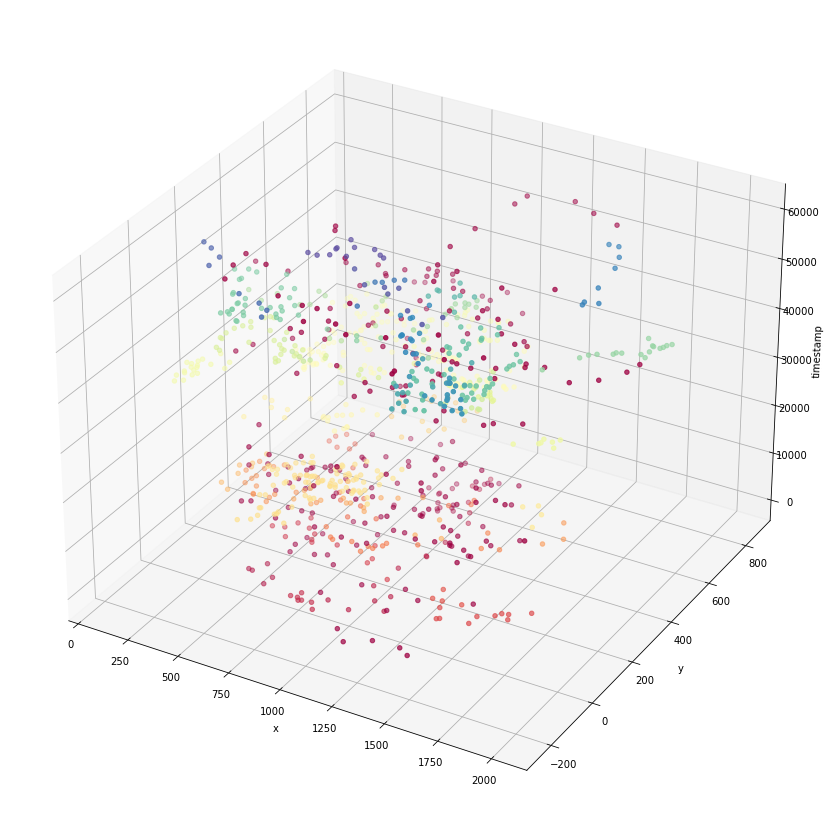

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation


filter3d = plt.figure(figsize=(15,15)).gca(projection='3d')

filter3d.scatter(X[:,1],X[:,2],X[:,0], c=y_pred, cmap=plt.cm.Spectral)
filter3d.set_xlabel('x')
filter3d.set_ylabel('y')
filter3d.set_zlabel('timestamp')

def rotate(angle):
     ax.view_init(azim=angle)

angle = 3
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, angle), interval=50)
ani.save('3d-OPTICS.gif', writer=animation.PillowWriter(fps=20))

In [94]:
# With XI metric
from sklearn.cluster import OPTICS, cluster_optics_dbscan

clf_optics = OPTICS(cluster_method = 'xi', xi=0.05, max_eps= 180, min_cluster_size = 5, min_samples=4, metric='euclidean', algorithm='auto', p=2)
X = session_arrays[0][:,0:3]
y_pred = clf_optics.fit_predict(X)

#plt.scatter3D(X[:,1],X[:,2],X[:,0], c=y_pred)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,1],X[:,2],X[:,0], c=y_pred)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# ST_DBSCAN

In [1]:
pip install st-dbscan

     |████████████████████████████████| 435 kB 2.6 MB/s eta 0:00:01
  Created wheel for st-dbscan: filename=st_dbscan-0.1.5-py2.py3-none-any.whl size=6177 sha256=539d16340649aac205a302c8cc0e3c9a3daf183dbacaeed4a1a74e91e1d1863a
  Stored in directory: /Users/Taimur/Library/Caches/pip/wheels/f1/42/a5/08417b9d8132ee19948cf969cf304b868af487b5ba3fe9de9d
Successfully built st-dbscan
Note: you may need to restart the kernel to use updated packages.


In [95]:
from st_dbscan import ST_DBSCAN

st_dbscan = ST_DBSCAN(eps1 = 70, eps2 = 250, min_samples = 4) 

st_dbscan.fit(X)

In [96]:
st_dbscan.labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3, -1,  3,
        3,  3, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  4,
        4,  4,  4,  4,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  5,  5,  5,  5,
        5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  7,
        7,  7,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [146]:
pip install ipympl

     |████████████████████████████████| 105 kB 2.6 MB/s eta 0:00:01


Note: you may need to restart the kernel to use updated packages.


In [97]:

y_pred = np.array(st_dbscan.labels)

# Change labels in the clusters

for i in range(y_pred.size):
    if y_pred[i] >= 0:
        y_pred[i] = 1

sliced = y_pred[0:450]
  
# We double all numbers using map() 



fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,1],X[:,2],X[:,0], c=y_pred)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# ST-OPTICS

In [31]:
pip install st_optics

     |████████████████████████████████| 158 kB 2.4 MB/s eta 0:00:01
  Created wheel for st-optics: filename=st_optics-0.1.1-py2.py3-none-any.whl size=6028 sha256=88d4b906bf39897530d9508f1b7bf9c3507631654d8341a5c808f256bab0fa52
  Stored in directory: /Users/Taimur/Library/Caches/pip/wheels/c4/19/97/e7dbdb6f59b101972d05947409484bd2d99b0e047d2aa501aa
Successfully built st-optics
Note: you may need to restart the kernel to use updated packages.


In [89]:
from st_optics import ST_OPTICS


st_optics = ST_OPTICS(xi = 0.08, eps2 = 250, min_samples = 5)
st_optics.fit(X)

predictions = st_optics.labels

for i in range(predictions.size):
    if predictions[i] >= 0:
        predictions[i] = 1

          
%matplotlib widget
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:,1],X.iloc[:,2],X.iloc[:,0], c=predictions)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation


filter3d = plt.figure(figsize=(15,15)).gca(projection='3d')

filter3d.scatter(X[:,1],X[:,2],X[:,0], c=y_pred, cmap=plt.cm.Spectral)
filter3d.set_xlabel('x')
filter3d.set_ylabel('y')
filter3d.set_zlabel('timestamp')

def rotate(angle):
     ax.view_init(azim=angle)

angle = 3
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, angle), interval=200)
ani.save('3d-STOPTICS.gif', writer=animation.PillowWriter(fps=20))

# Applying ST-OPTICS to Dataset 1

In [100]:
url = urllib.request.urlopen("http://dschr.de/api/handLabeled")
data = json.loads(url.read().decode())
len(data)
ts1 = pandas.DataFrame(data[0]["data"]) # time series 1

In [101]:
ts1

,timestamp,x,y,label
0,39342,739.023953,417.475902,fixation
1,39380,707.481049,444.210737,fixation
2,39424,713.926225,445.593758,fixation
3,39469,704.775582,469.488595,fixation
4,39507,704.159921,476.988842,fixation
5,39546,747.280255,447.978626,fixation
6,39593,752.142984,492.622463,fixation
7,39634,767.401839,512.817108,fixation
8,39675,777.341754,508.626762,fixation
9,39715,727.863724,502.614338,fixation


In [102]:
#Plotting handlabeled session from dataset1
x = ts1.iloc[:,1].to_numpy()
y = ts1.iloc[:,2].to_numpy()
ts = ts1.iloc[:,0].to_numpy()
labels = ts1.iloc[:,3].to_numpy()

predics = labels

for i in range(predics.size):
    if predics[i] == "fixation":
        predics[i] = 1
    if predics[i] == "saccade":
        predics[i] = 0


%matplotlib widget
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,ts, c=predics)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [107]:
X = ts1.iloc[:,0:3]

st_optics = ST_OPTICS(xi = 0.08, eps2 = 250, min_samples = 5)
st_optics.fit(X)
 
    
    
predictions = st_optics.labels

for i in range(predictions.size):
    if predictions[i] >= 0:
        predictions[i] = 1
    elif predictions[i] <= 0:
        predictions[i] = 0
        


X["hand-labels"] = predics
X["ml-labels"] = predictions


X

,timestamp,x,y,hand-labels,ml-labels
0,39342,739.023953,417.475902,1,0
1,39380,707.481049,444.210737,1,0
2,39424,713.926225,445.593758,1,1
3,39469,704.775582,469.488595,1,1
4,39507,704.159921,476.988842,1,1
5,39546,747.280255,447.978626,1,1
6,39593,752.142984,492.622463,1,1
7,39634,767.401839,512.817108,1,1
8,39675,777.341754,508.626762,1,1
9,39715,727.863724,502.614338,1,1


In [108]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score


y_pred = X.iloc[:,4]
y_true = X.iloc[:,3]

y_t = y_true.astype(int)

acc = accuracy_score(y_t, y_pred)
acc


0.7538644470868014

In [25]:
X.to_json (r'\Export_DataFrame.json')

In [ ]:
          
%matplotlib widget
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,ts, c=predictions)

In [86]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation



filter3d = plt.figure(figsize=(15,15)).gca(projection='3d')

filter3d.scatter(X.iloc[:,1],X.iloc[:,2],X.iloc[:,0], c=y_pred, cmap=plt.cm.Spectral)
filter3d.set_xlabel('x')
filter3d.set_ylabel('y')
filter3d.set_zlabel('timestamp')

def rotate(angle):
     ax.view_init(azim=angle)

angle = 3
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, angle), interval=400)
ani.save('3d-STOPTICS.gif', writer=animation.PillowWriter(fps=20))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …